In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
df_features = pd.read_csv("Earthquake_features (1).csv")
df_features.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
0,2024-03-19,11.67,0.89,Washington,46.893574,-122.197592,9.857273,10.536000,12.572857,0.673636,0.711333,0.470000,0
1,2024-03-19,27.88,1.49,Washington,46.893574,-122.197592,10.806818,12.246667,16.815714,0.731818,0.834000,0.822857,0
2,2024-03-19,19.98,2.17,Washington,46.893574,-122.197592,11.337727,13.080667,16.481429,0.826818,0.963333,0.948571,0
3,2024-03-19,9.12,1.45,Washington,46.893574,-122.197592,11.833182,13.411333,15.157143,0.867727,1.028000,1.030000,0
4,2024-03-19,16.11,0.91,Washington,46.893574,-122.197592,12.157273,14.536667,14.940000,0.865455,0.961333,0.998571,0


In [ ]:
df_predict = pd.read_csv("Earthquake_predict (1).csv")
df_predict.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
0,2024-04-13,11.68,2.16,Washington,46.893574,-122.197592,10.073636,10.924000,8.140000,0.870455,0.933333,1.207143,NaN
1,2024-04-13,20.04,1.79,Washington,46.893574,-122.197592,10.329545,11.034000,11.127143,0.935000,0.972667,1.212857,NaN
2,2024-04-13,-0.23,1.39,Washington,46.893574,-122.197592,10.400000,10.601333,11.147143,1.006364,1.034667,1.231429,NaN
3,2024-04-14,-1.85,-1.03,Washington,46.893574,-122.197592,9.897727,9.619333,10.911429,0.930000,0.944000,0.890000,NaN
4,2024-04-14,20.47,0.72,Washington,46.893574,-122.197592,10.480000,10.590667,11.234286,0.969545,0.996667,0.858571,NaN


In [ ]:
features = [f for f in list(df_features) if f not in ['date', 'lon_box_mean',
 'lat_box_mean', 'mag_outcome', 'mag', 'place',
 'combo_box_mean',  'latitude',
 'longitude']]

X_train, X_test, y_train, y_test = train_test_split(df_features[features],
                     df_features['mag_outcome'], test_size=0.3, random_state=42)

In [ ]:
features

['depth',
 'depth_avg_22',
 'depth_avg_15',
 'depth_avg_7',
 'mag_avg_22',
 'mag_avg_15',
 'mag_avg_7']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid ={
              "base_estimator__max_depth" :   [2,5,7],
              "n_estimators": [200, 400, 600]
             }

tree = DecisionTreeClassifier()

ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [ ]:
grid_search_ABC = GridSearchCV(ABC,
                               param_grid=param_grid,
                               scoring = 'roc_auc',
                               return_train_score=True,
                               verbose = 1)

In [ ]:
grid_search_ABC.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             param_grid={'base_estimator__max_depth': [2, 5, 7],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
pred_ABC=grid_search_ABC.predict(X_test)

[[2380    7]
 [   2   89]]


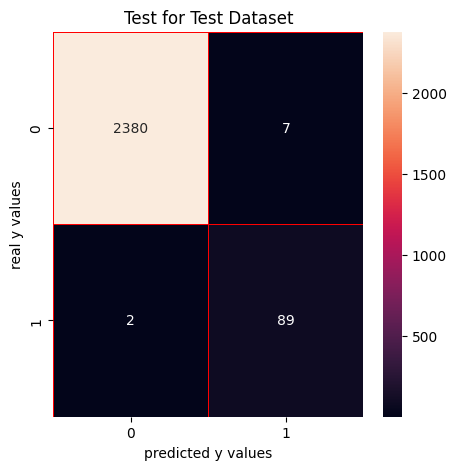


Recall 'TP/TP+FN' =  0.978021978021978


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_ABC))
cm_lrc = confusion_matrix(y_test,pred_ABC)

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

# print(roc_auc_score(y_test, pred_ABC))

# fpr, tpr, _ = roc_curve(y_test, pred_ABC)
# roc_auc = auc(fpr, tpr)
# print('AUC:', np.round(roc_auc,4))

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()


# print("Confusion Matrix: \n",confusion_matrix(y_test,pred_ABC))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,pred_ABC))

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [ ]:
pred=CV_rfc.predict(X_test)

0.9877541813025684
[[2381    6]
 [   2   89]]


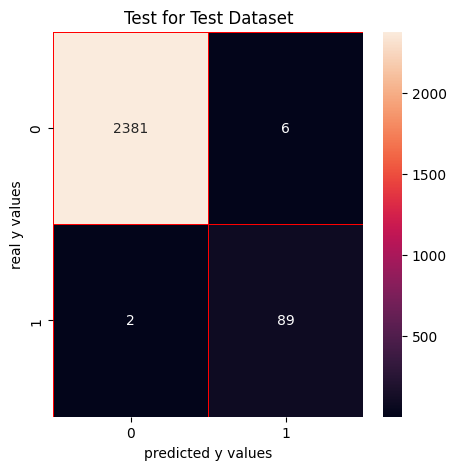


Recall 'TP/TP+FN' =  0.978021978021978


In [ ]:
print(roc_auc_score(y_test, pred))


# confusion matrix
# from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
cm_lrc = confusion_matrix(y_test,pred)

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

# fpr, tpr, _ = roc_curve(y_test, pred)
# roc_auc = auc(fpr, tpr)
# print('AUC:', np.round(roc_auc,4))

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()


# print("Confusion Matrix: \n",confusion_matrix(y_test,pred))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:41:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


0.9996915526869443
AUC: 0.9997
[[2382    5]
 [   5   86]]


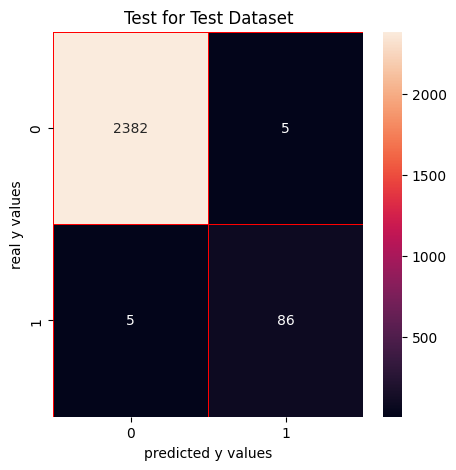

In [ ]:
from sklearn.metrics import roc_curve, auc

dtrain = xgb.DMatrix(X_train[features], label=y_train)
dtest = xgb.DMatrix(X_test[features], label=y_test)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

param = {
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'eval_metric': 'auc',
        'max_depth': 6,
        'eta': 0.003,
        'silent': 1}
num_round = 5000
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

print (roc_auc_score(y_test, preds))
fpr, tpr, _ = roc_curve(y_test, preds)
binary_preds = (preds > 0.5).astype(int)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, binary_preds))
cm_lrc = confusion_matrix(y_test, binary_preds)

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

print("\nRecall 'TP/TP+FN' = ", recall_score(y_test, binary_preds))

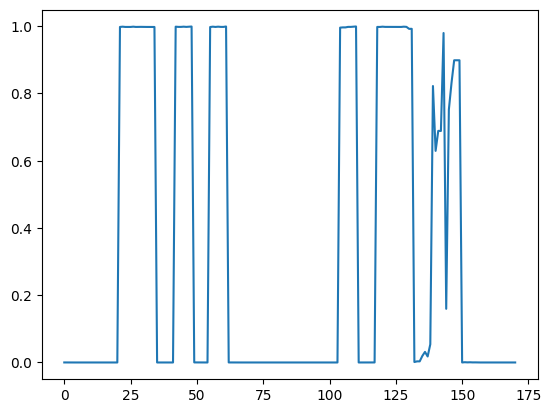

In [ ]:
dlive = xgb.DMatrix(df_predict[features]) #, label=[])
preds = bst.predict(dlive)

plt.plot(preds)
plt.show()

In [ ]:
live_set = df_predict[['date', 'place', 'latitude', 'longitude']]
live_set.loc[:,'quake'] = preds
live_set = live_set.groupby(['date', 'place'], as_index=False).mean()

live_set['date']= pd.to_datetime(live_set['date'],format='%Y-%m-%d')
live_set['date'] = live_set['date'] + pd.to_timedelta(7,unit='d')

live_set.tail()

<ipython-input-18-13200b993e99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live_set.loc[:,'quake'] = preds


,date,place,latitude,longitude,quake
73,2024-04-22,Oklahoma,35.471218,-97.067895,0.000052
74,2024-04-22,Papua New Guinea,-4.926784,146.838274,0.998525
75,2024-04-22,Puerto Rico,18.154178,-66.671671,0.630361
76,2024-04-22,Texas,31.387755,-102.707270,0.000052
77,2024-04-22,Utah,38.743964,-112.715785,0.000148


In [ ]:
import datetime as dt
days = list(set([d for d in live_set['date'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))
days.sort()

predict_day=days[2]
predict_day

'2024-04-18'

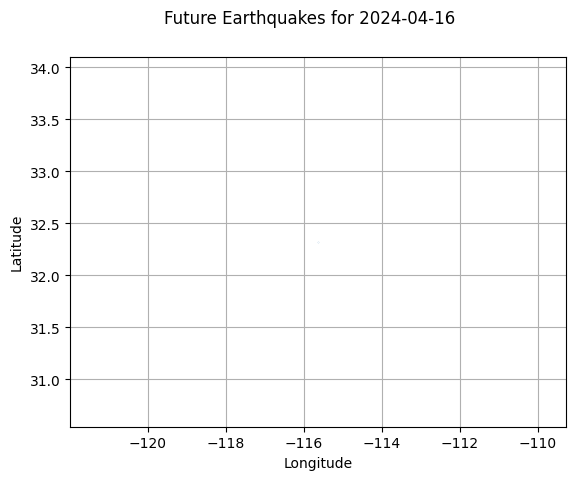

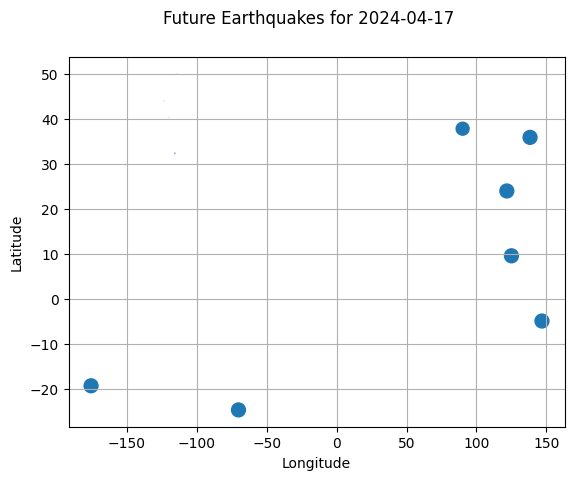

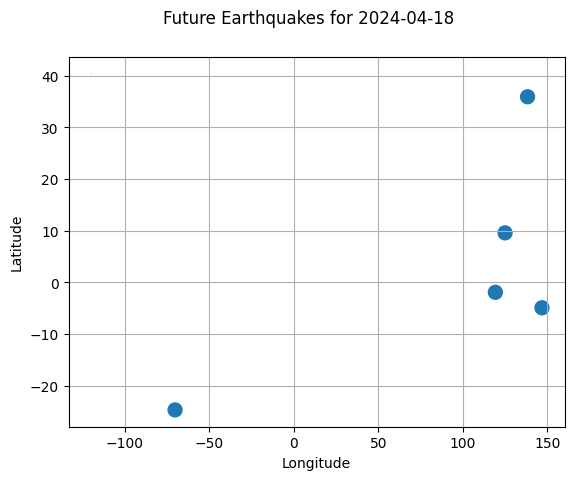

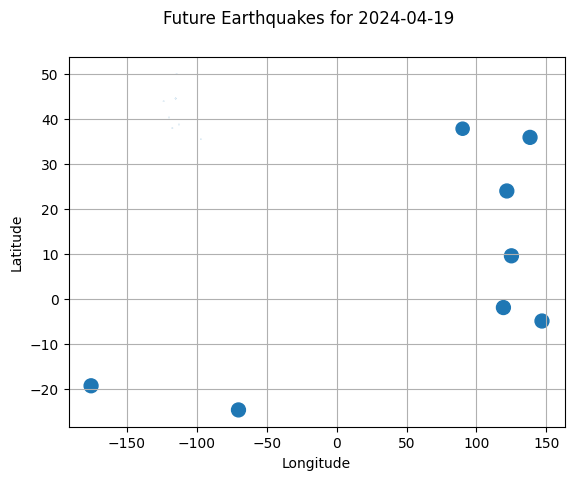

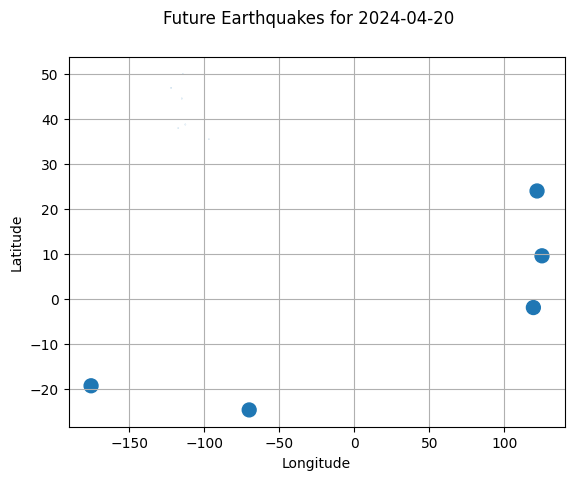

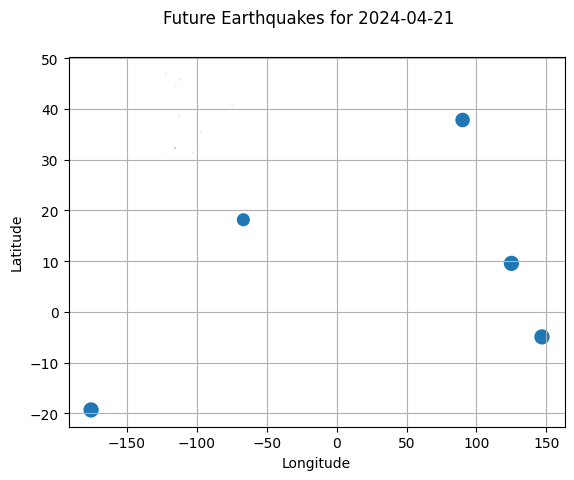

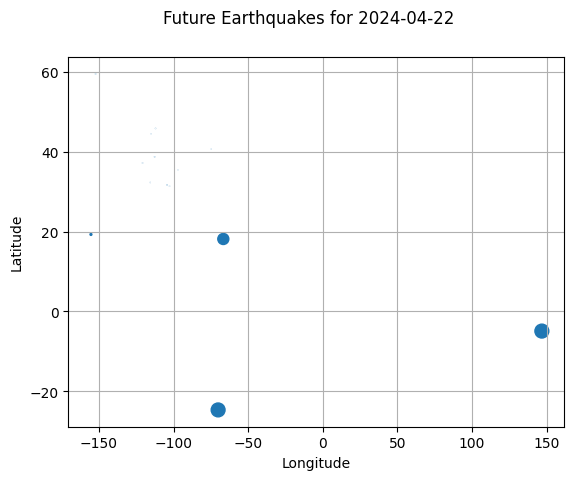

In [ ]:

for i in range(0,7):
    live_set_tmp = live_set[live_set['date'] == days[i]]
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['quake'] * 100))
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()